In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
message=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')

In [4]:
message=message[['v1','v2']]

In [5]:
message.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
message.columns=['label','message']

In [7]:
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [10]:
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(message['label'])
y=y.iloc[:,1].values

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

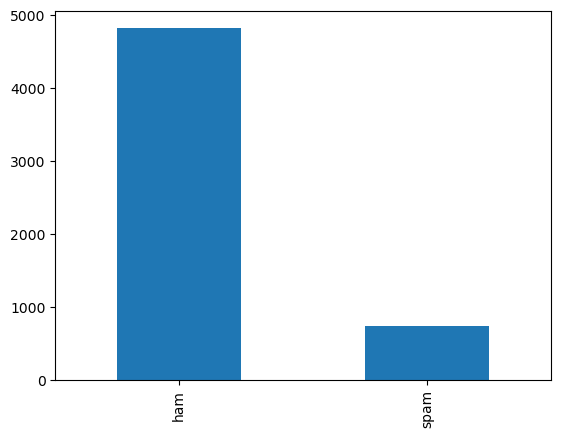

In [12]:
message['label'].value_counts().plot(kind='bar')

In [13]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8))

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [16]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
print(confusion_matrix(y_test,pred))

[[964   1]
 [ 24 126]]


In [19]:
print(accuracy_score(y_test,pred))

0.9775784753363229


In [20]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)
pred2=model_2.predict(X_test)

In [21]:
print(confusion_matrix(y_test,pred2)),print(accuracy_score(y_test,pred2))

[[957   8]
 [ 22 128]]
0.9730941704035875


(None, None)

In [22]:
model_3=MultinomialNB()
model_3.fit(X_train,y_train)
pred3=model_3.predict(X_test)

In [23]:
print(confusion_matrix(y_test,pred3)),print(accuracy_score(y_test,pred3))

[[955  10]
 [ 10 140]]
0.9820627802690582


(None, None)

The Naive Bayes Giving more accuracy in terms of spam detection 